### Importation de librairies

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Importation des data

In [4]:
ROOT = "/content/drive/Shareddrives/Canvas ECo energy/Eco Energy Energy Live Capstone/datasets/"

dred = "DRED.csv"
qud = "QUD.csv"
sim = "SimDataset.csv"

# df = pd.read_csv(ROOT+dred, names= ["occupancy", "P", "Pn", "P+t1", "P-t1","class_state"] )   [occupancy , power comsumption, normalized, P+t1, P-t1, Micro-moment]

rw_dred = pd.read_csv(ROOT+dred, names= ["occupancy", "P", "Pn", "P+t1", "P-t1","class_state"], header=None)
rw_qud = pd.read_csv(ROOT+qud, names= ["occupancy", "P", "Pn", "P+t1", "P-t1","class_state"], header=None)
rw_sim = pd.read_csv(ROOT+sim, header=None)

print(f"Vsisualisation des donnees : \n\n")
print(f"dred ==> \n{rw_dred.head()}\n")
print(f"qud ==> \n{rw_qud.head()}\n")
print(f"sim ==> \n{rw_sim.head()}\n")


print(f"Vsisualisation des statistiques sur les donnees : \n\n")
print(f"dred ==> \n{rw_dred.describe()}\n")
print(f"qud ==> \n{rw_qud.describe()}\n")
print(f"sim ==> \n{rw_sim.describe()}\n")


print(f"Vsisualisation des infos sur les donnees : \n\n")
print(f"dred ==> \n\n")
print(f" {rw_dred.info()}\n")

print(f"qud ==> \n\n")
print(f" {rw_qud.info()}\n")

print(f"sim ==> \n\n")
print(f"{rw_sim.info()}\n")



dred_corr = rw_dred.corr()
qud_corr = rw_qud.corr()
sim_corr = rw_sim.corr()




# Generate a mask for the upper triangle
mask1 = np.triu(np.ones_like(dred_corr, dtype=bool))
mask2 = np.triu(np.ones_like(qud_corr, dtype=bool))
mask3 = np.triu(np.ones_like(sim_corr, dtype=bool))

fig, (ax1) = plt.subplots(1, 1 ,  figsize=(15,15))  # figsize=(11,9)
fig.suptitle('Matrices de corelation des DRED')
# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)
ax1.plot()
sns.heatmap(dred_corr, mask=mask1, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)
plt.show()
print()

fig, (ax2) = plt.subplots(1, 1 , figsize=(15,15))  # figsize=(11,9)
fig.suptitle('Matrices de corelation des QUD')
# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)
ax2.plot()
sns.heatmap(qud_corr, mask=mask2, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)
plt.show()
print()

fig, (ax3) = plt.subplots(1, 1 , figsize=(15,15))  # figsize=(11,9)
fig.suptitle('Matrices de corelation des SIM')
# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)
ax3.plot()
sns.heatmap(sim_corr, mask=mask3, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)
plt.show()
print()

##
plt.title("Distribution des classes \nDRED")
sns.histplot(rw_dred , x=rw_dred.iloc[:,-1], kde=True)
plt.xlabel("Classes")
plt.show()
print()

plt.title("Distribution des classes \nQUD")
sns.histplot(rw_qud , x=rw_qud.iloc[:,-1], kde=True)
plt.xlabel("Classes")
plt.show()
print()

plt.title("Distribution des classes \nSIM")
sns.histplot(rw_sim , x=rw_sim.iloc[:,-1], kde=True)
plt.xlabel("Classes")
plt.show()
print()

##
sns.set(style="darkgrid")

g1 = sns.countplot(x=rw_dred.iloc[:,5])
g1.set_xticklabels(['Bon usage','Allume','Eteint','Usage excessif',"Consommation a l'exterieur"])
plt.xticks(rotation=30)
plt.xlabel('Classes')
plt.title("Dred")
plt.show()
print()

g2 = sns.countplot(x=rw_qud.iloc[:,5])
g2.set_xticklabels(['Bon usage','Allume','Eteint','Usage excessif',"Consommation a l'exterieur"])
plt.xticks(rotation=30)
plt.xlabel('Classes')
plt.title("Qud")
plt.show()
print()

g2 = sns.countplot(x=rw_sim.iloc[:,10])
g2.set_xticklabels(['Bon usage','Allume','Eteint','Usage excessif',"Consommation a l'exterieur"])
plt.xticks(rotation=30)
plt.xlabel('Classes')
plt.title("Simulated")
plt.show()
print()

##
plt.plot(rw_qud['Pn'][0:50])
plt.xlabel('Timestep')
plt.ylabel("Power Consumption (w)")
plt.title("Consommation de puissance pour un echantillons" , {'fontsize': 9}  )
plt.show()
print()
sns.violinplot(rw_qud['P'][:])
plt.xlabel('Timestep')
plt.ylabel("Power Consumption (w)")
plt.title("Densite des puissances" , {'fontsize': 9}  )
plt.show()
print()
sns.boxplot(rw_qud['P'][:])
plt.xlabel('Timestep')
plt.ylabel("Power Consumption (w)")
plt.title("Statistiques des puissances" , {'fontsize': 9}  )
plt.show()
print()

##
plt.plot(rw_dred['P'][0:])
plt.xlabel('Timestep')
plt.ylabel("Power Consumption (w)")
plt.title("Extrait de la consommation de puissance pour un echantillons" , {'fontsize': 9}  )
plt.show()
print()
sns.violinplot(rw_dred['P'][:])
plt.xlabel('Timestep')
plt.ylabel("Power Consumption (w)")
plt.title("Densite des puissances" , {'fontsize': 9}  )
plt.show()
print()
sns.boxplot(rw_dred['P'][:])
plt.xlabel('Timestep')
plt.ylabel("Power Consumption (w)")
plt.title("Statistiques des puissances" , {'fontsize': 9}  )
plt.show()
print()

##
# print(f"Vsisualisation du balancement des classes : \n\n")


# print(f"\ndred ==>")
# rw_dred_classes = rw_dred.iloc[:,5].value_counts( sort=False )
# labels1 = [ '0' , '1' , '2' , '3' , '4' ]
# print(f"{ rw_dred_classes }\n")
# print(f"{ (rw_dred_classes  / rw_dred.shape[0]) *100}\n")
# #define Seaborn color palette to use
# colors = sns.color_palette('pastel')[0:5]
# #create pie chart
# plt.pie(rw_dred_classes, labels = labels1,  colors = colors, autopct='%.0f%%')
# plt.show()

# print(f"\n\nqud ==>")
# rw_qud_classes = rw_qud.iloc[:,5].value_counts( sort=False )
# labels2 = [ '0' , '1' , '2' , '3' , '4' ]
# print(f"{rw_qud_classes}\n")
# print(f"{ (rw_qud_classes  / rw_qud.shape[0]) *100}\n")
# #define Seaborn color palette to use
# colors = sns.color_palette('pastel')[0:5]
# #create pie chart
# plt.pie(rw_qud_classes, labels = labels2, colors = colors, autopct='%.0f%%') # labels = labels2
# plt.show()

# print(f"\n\nsim ==>")
# rw_sim_classes = rw_sim.iloc[:,10].value_counts( sort=False ) 
# labels3 = [ '0' , '1' , '2' , '3' , '4' ]
# print(f"{rw_sim_classes}\n")
# print(f"{ (rw_sim_classes  / rw_sim.shape[0]) *100}\n")
# #define Seaborn color palette to use
# colors = sns.color_palette('pastel')[0:5]
# #create pie chart
# plt.pie(rw_sim_classes, labels = labels3, colors = colors, autopct='%.0f%%')
# plt.show()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(dred_corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(dred_corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)
print()
print()

##
sns.pairplot(rw_qud, hue='class_state', corner=True)
plt.show()
print()

sns.pairplot(rw_dred, hue='class_state', corner=True)
plt.show()
print()

##
fig = plt.subplots( figsize =  (20,20)  )
plt.suptitle( "Distribution donnees de \nDred" )
sns.pairplot(rw_sim, hue=10, corner=True)
plt.show()
print()

##
fig = plt.subplots( figsize =  (15,15)  )
plt.title( "Correlation du dataset \nDred" )
sns.heatmap( dred_corr , annot=True )
print()

fig = plt.subplots( figsize =  (15,15)  )
plt.title( "Correlation du dataset \nQud" )
sns.heatmap( qud_corr , annot=True )
print()

fig = plt.subplots( figsize =  (15,15)  )
plt.title( "Correlation du dataset \nSim" )
sns.heatmap( sim_corr , annot=True )
print()

In [5]:
# ##
# idx = []
# for i in range(len(rw_qud)):  
#   # print(idx)
#   # idx.append(idx)
#   # print(i)
#   if i<0:
#     idx = np.where( i<0 )
#     print(idx)

# print(idx)
# ##
# df.nunique()
# ##
# for i in df.columns:
#   count = df[i].unique()
#   if len(count) <=20:
#     print(f"\n\nLes valeurs uniques ici sont:\n {i} == > {count}\n")

### Pre-processing
---
> Tâches à faire: 

- Recherche sur le Federated Learning – Tous 
- Prétraitement des datasets 
- Rajouter le sliding window 
```python
    def slide_window(self, dataset, window_size=7):
        X, y = [], []
        # Trouver toutes les sequences de 'window_size' donnees, dans le dataset,
        # ainsi que leur 'y' (target)
        for i in range( dataset.shape[0] - window_size ):
            X.append( dataset[ i : i + window_size, : ] )
            y.append( dataset[i + window_size, 0] )
        return np.asarray(X).astype(np.float32) , np.asarray(y).astype(np.float32)
```
- Rajouter la colonne timestep et compte 
- Éliminer les colonnes inutiles (Power, p(t-1), p(t+1)) 
- Rajouter le floor à 0 

>> QUD - Georges 

>> DRED - Frédéric 

- Création du répertoire Git - Tristan 

- Modifier la présentation pour la conférence - Tous 

- Rajouter le contenu pour la semaine du 22 mai - Tous 

- Faire verifier le contenu par un professeur - Tous 

- Dry run le **29 mai** - Tous 

- Présentation le **31 mai** à 17h - Tous 


**Remarques:**
- pas besoin de retirer les colonnes p(t-1), p(t+1) mais retirer uniquement la colonne power car ces colonnes agissent (s'activent) lorsque il y'a variation de classes, ce qui les rendent importantes pour deceler des changements
- par contre il faudrait comprendre la formule de Pnormalized afin de l'integrer dans le pipeline
- au lieu de paniquer avec le kmean pour creer nos classes, on va implementer l'agorithme classification illustree par la figure ci-dessous



<img src="https://drive.google.com/file/d/1GUi1QVc_lcydYvQuBvn4H2gSw0aIlv1h/view?usp=share_link"  />

![img](https://drive.google.com/file/d/1GUi1QVc_lcydYvQuBvn4H2gSw0aIlv1h/view?usp=share_link)

<!-- ![image](MicrosoftTeams-image (16).png) -->

#### Fonctions utils

In [5]:
# fonction pour creer la sliding windows

def slide_window(dataset, window_size=7):
    oc1, oc2, oc3, p1, p2, p3, pn1, pn2, pn3, pt01, pt02, pt03 , ptn01, ptn02, ptn03 , pt11, pt22, ptn33 , ptn11, ptn22, ptn33 ,cl1, cl2, cl3 = [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], []
    y1, y2, y3 = [], [], []

    X, y = [], []
    input ,output =[], []

    # Trouver toutes les sequences de 'window_size' donnees, dans le dataset,
    # ainsi que leur 'y' (target)
    for i in range( dataset.shape[0] - window_size ):
        X = dataset.iloc[ i : i + window_size, : ] 
        y = dataset.iloc[i + window_size, -1] 

        oc1 = X.iloc[0,0], 
        oc2 = X.iloc[1,0], 
        oc3 = X.iloc[2,0], 
        p1 = X.iloc[0,1], 
        p2 = X.iloc[1,1], 
        p3 = X.iloc[2,1], 
        pn1 = X.iloc[0,2], 
        pn2 = X.iloc[1,2], 
        pn3 = X.iloc[2,2], 
        pt01 = X.iloc[0,3], 
        pt02 = X.iloc[1,3], 
        pt03 = X.iloc[2,3],
        pt11 = X.iloc[0,4], 
        pt22 = X.iloc[1,4], 
        pt33 = X.iloc[2,4],
        cl1 = X.iloc[0,5], 
        cl2 = X.iloc[1,5], 
        cl3 = X.iloc[2,5],
        ptn01 = X.iloc[0,6], 
        ptn02 = X.iloc[1,6], 
        ptn03 = X.iloc[2,6],
        ptn11 = X.iloc[2,7], 
        ptn22 = X.iloc[2,7], 
        ptn33 = X.iloc[2,7],
        y1 = y

        input.append( [[oc1, oc2, oc3, p1, p2, p3, pn1, pn2, pn3, pt01, pt02, pt03 ,pt11, pt22, pt33 ,cl1, cl2, cl3 , ptn01, ptn02, ptn03 , ptn11, ptn22, ptn33 ]] )
        output.append( y1 )


    return np.asarray(input).astype(np.float32) , np.asarray(output).astype(np.float32)
      

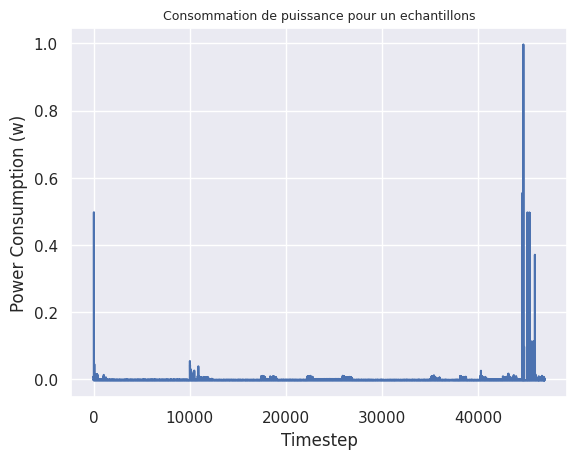

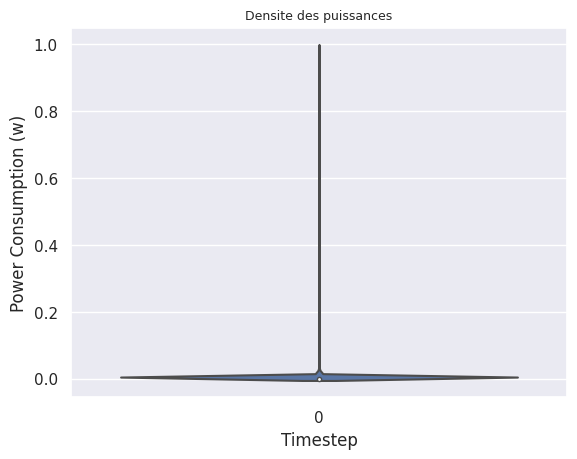

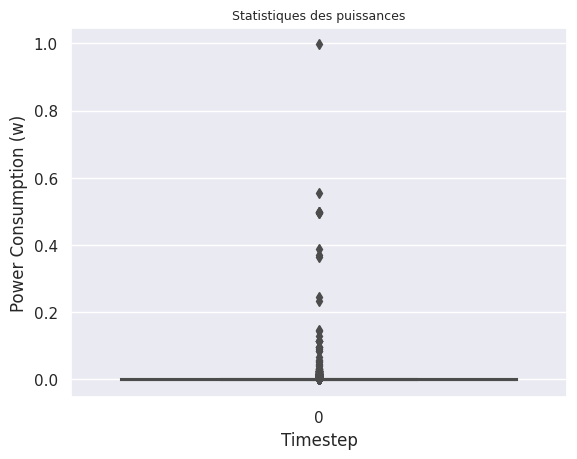

In [6]:
debut = 0
fin   = -1
plt.plot(rw_qud['Pn'][debut:fin])
plt.xlabel('Timestep')
plt.ylabel("Power Consumption (w)")
plt.title("Consommation de puissance pour un echantillons" , {'fontsize': 9}  )
plt.show()
print()
sns.violinplot(rw_qud['Pn'][debut:fin])
plt.xlabel('Timestep')
plt.ylabel("Power Consumption (w)")
plt.title("Densite des puissances" , {'fontsize': 9}  )
plt.show()
print()
sns.boxplot(rw_qud['Pn'][debut:fin])
plt.xlabel('Timestep')
plt.ylabel("Power Consumption (w)")
plt.title("Statistiques des puissances" , {'fontsize': 9}  )
plt.show()

#### QUD

In [7]:
rw_qud['P+t1 Norm'] = (rw_qud['P+t1'] - rw_qud['P+t1'].mean() / ( rw_qud['P+t1'].max() - rw_qud['P+t1'].min())   ) 
rw_qud['P-t1 Norm'] = (rw_qud['P-t1'] - rw_qud['P-t1'].mean() / ( rw_qud['P-t1'].max() - rw_qud['P-t1'].min())   )

rw_qud.head()

,occupancy,P,Pn,P+t1,P-t1,class_state,P+t1 Norm,P-t1 Norm
0,1,0.00,-0.002259,0.00,0.00,0,-0.000023,0.000023
1,1,0.00,-0.002259,-166.43,0.00,1,-166.430023,0.000023
2,1,166.43,0.007632,0.00,166.43,3,-0.000023,166.430023
3,1,159.55,0.007223,0.00,0.00,3,-0.000023,0.000023
4,1,143.27,0.006255,0.00,0.00,3,-0.000023,0.000023


[[1.0000000e+00 1.0000000e+00 1.0000000e+00 ... 1.6643002e+02
  1.6643002e+02 1.6643002e+02]
 [1.0000000e+00 1.0000000e+00 1.0000000e+00 ... 2.2675449e-05
  2.2675449e-05 2.2675449e-05]
 [1.0000000e+00 1.0000000e+00 1.0000000e+00 ... 2.2675449e-05
  2.2675449e-05 2.2675449e-05]
 ...
 [1.0000000e+00 1.0000000e+00 1.0000000e+00 ... 2.2675449e-05
  2.2675449e-05 2.2675449e-05]
 [1.0000000e+00 1.0000000e+00 1.0000000e+00 ... 2.2675449e-05
  2.2675449e-05 2.2675449e-05]
 [1.0000000e+00 1.0000000e+00 1.0000000e+00 ... 2.2675449e-05
  2.2675449e-05 2.2675449e-05]]


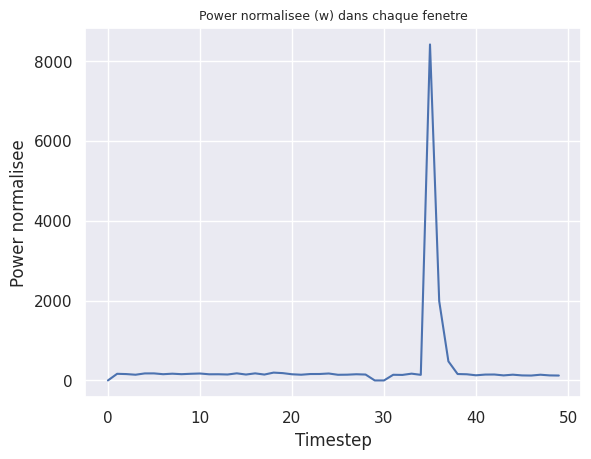

,oc1,oc2,oc3,p1,p2,p3,pn1,pn2,pn3,pt01,...,ptn11,ptn22,ptn33,out,temps_lecture,mean_norm,mean,diff,std_window,norm_window
0,1.0,1.0,1.0,0.000000,0.000000,166.429993,-0.002259,-0.002259,0.007632,0.000000,...,166.430023,166.430023,166.430023,0.000023,2,0.001038,55.476665,NaN,0.005711,1.018124e-08
1,1.0,1.0,1.0,0.000000,166.429993,159.550003,-0.002259,0.007632,0.007223,-166.429993,...,0.000023,0.000023,0.000023,0.000023,2,0.004198,108.659996,0.009891,0.000236,8.883902e-12
2,1.0,1.0,1.0,166.429993,159.550003,143.270004,0.007632,0.007223,0.006255,0.000000,...,0.000023,0.000023,0.000023,0.000023,2,0.007037,156.416672,-0.000409,0.000559,3.455083e-11
3,1.0,1.0,1.0,159.550003,143.270004,175.880005,0.007223,0.006255,0.008193,0.000000,...,0.000023,0.000023,0.000023,0.000023,2,0.007224,159.566666,-0.000968,0.001119,1.358954e-10
4,1.0,1.0,1.0,143.270004,175.880005,176.660004,0.006255,0.008193,0.008240,0.000000,...,0.000023,0.000023,0.000023,0.000023,2,0.007563,165.270004,0.001938,0.000027,7.488641e-14


In [9]:
rw_qud.shape , rw_qud.shape[0]-3
input_qud, output_qud = slide_window(dataset=rw_qud ,window_size=3)
input_qud = input_qud.squeeze()
print(input_qud)

input_qud.shape , output_qud.shape

new_qud_dataset = np.concatenate((input_qud, np.expand_dims(output_qud, axis=-1)) , axis = 1)

df_qud = pd.DataFrame(new_qud_dataset, columns = ['oc1','oc2','oc3','p1','p2','p3','pn1','pn2','pn3','pt01','pt02','pt03' ,'pt11','pt22','pt33' ,'cl1','cl2','cl3',  'ptn01' , ' ptn02' , ' ptn03 ' , ' ptn11' , ' ptn22' , ' ptn33', 'out'] )

df_qud['temps_lecture'] = 2 # les releves sont faits toutes les 2 min
df_qud['mean_norm'] = (df_qud['pn1'] + df_qud['pn2'] + df_qud['pn3'] ) / 3 # moyenne des valeurs normalisees pour une window
df_qud['mean'] = (df_qud['p1'] + df_qud['p2'] + df_qud['p3'] ) / 3 # moyenne des valeurs power pour une window
df_qud['diff'] = df_qud[['pn2']].diff() # difference des valeurs consecutives pour la valeur intermediare(mileu) d'une fenetre
df_qud['std_window'] = df_qud[['pn2' , 'pn2' , 'pn3']].std(axis=1) # std de Pn1, Pn2, Pn3
df_qud['norm_window'] = ( df_qud['std_window']/df_qud['mean'] ) * ((df_qud[['pn2' , 'pn2' , 'pn3']].max(axis=1) - df_qud[['pn2' , 'pn2' , 'pn3']].min(axis=1)) /100) # normalization de Pn1, Pn2, Pn3 


df_qud.to_excel("/content/drive/MyDrive/Ecoenergy/new_qud_01_20230516.xlsx")

debut = 0
fin   = 50
plt.plot(df_qud['p2'][debut:fin])
plt.xlabel('Timestep')
plt.ylabel("Power normalisee")
plt.title("Power normalisee (w) dans chaque fenetre" , {'fontsize': 9}  )
plt.show()
print()

df_qud.head()

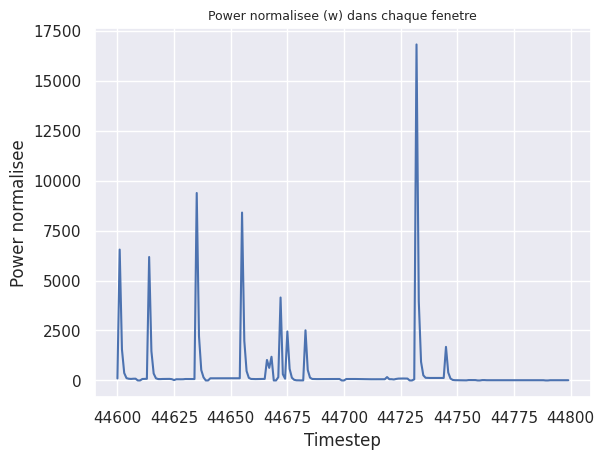

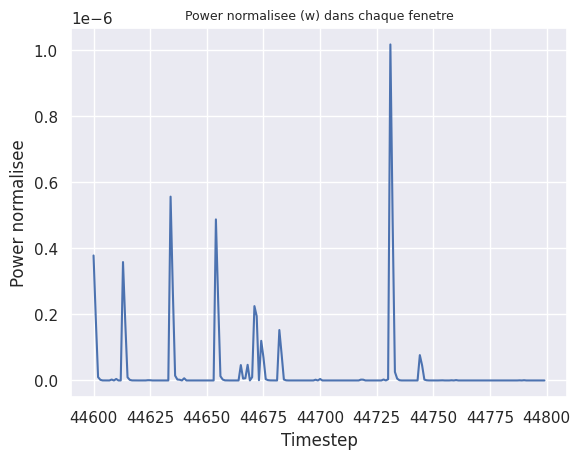

,oc1,oc2,oc3,p1,p2,p3,pn1,pn2,pn3,pt01,...,ptn11,ptn22,ptn33,out,temps_lecture,mean_norm,mean,diff,std_window,norm_window
0,1.0,1.0,1.0,0.000000,0.000000,166.429993,-0.002259,-0.002259,0.007632,0.000000,...,166.430023,166.430023,166.430023,0.000023,2,0.001038,55.476665,NaN,0.005711,1.018124e-08
1,1.0,1.0,1.0,0.000000,166.429993,159.550003,-0.002259,0.007632,0.007223,-166.429993,...,0.000023,0.000023,0.000023,0.000023,2,0.004198,108.659996,0.009891,0.000236,8.883902e-12
2,1.0,1.0,1.0,166.429993,159.550003,143.270004,0.007632,0.007223,0.006255,0.000000,...,0.000023,0.000023,0.000023,0.000023,2,0.007037,156.416672,-0.000409,0.000559,3.455083e-11
3,1.0,1.0,1.0,159.550003,143.270004,175.880005,0.007223,0.006255,0.008193,0.000000,...,0.000023,0.000023,0.000023,0.000023,2,0.007224,159.566666,-0.000968,0.001119,1.358954e-10
4,1.0,1.0,1.0,143.270004,175.880005,176.660004,0.006255,0.008193,0.008240,0.000000,...,0.000023,0.000023,0.000023,0.000023,2,0.007563,165.270004,0.001938,0.000027,7.488641e-14


In [15]:
debut = 44600
fin   = 44800

plt.plot(df_qud['p2'][debut:fin])
plt.xlabel('Timestep')
plt.ylabel("Power normalisee")
plt.title("Power normalisee (w) dans chaque fenetre" , {'fontsize': 9}  )
plt.show()
print()

plt.plot(df_qud['norm_window'][debut:fin])
plt.xlabel('Timestep')
plt.ylabel("Power normalisee")
plt.title("Power normalisee (w) dans chaque fenetre" , {'fontsize': 9}  )
plt.show()
print()

df_qud.head()

#### DRED

[[1. 1. 0. ... 0. 0. 0.]
 [1. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 1. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]]


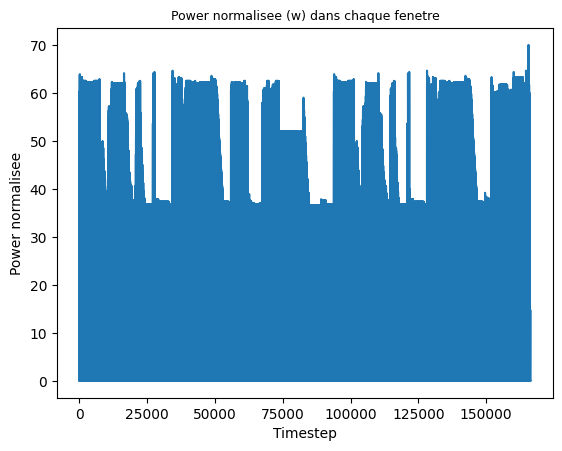

,oc1,oc2,oc3,p1,p2,p3,pn1,pn2,pn3,pt01,...,pt22,pt33,cl1,cl2,cl3,out,temps_lecture,mean_norm,mean,diff
0,1.0,1.0,0.0,0.0,0.0,0.0,-0.68907,-0.68907,-0.68907,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2,-0.68907,0.0,NaN
1,1.0,0.0,1.0,0.0,0.0,0.0,-0.68907,-0.68907,-0.68907,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2,-0.68907,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,-0.68907,-0.68907,-0.68907,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2,-0.68907,0.0,0.0
3,1.0,0.0,1.0,0.0,0.0,0.0,-0.68907,-0.68907,-0.68907,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2,-0.68907,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,-0.68907,-0.68907,-0.68907,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2,-0.68907,0.0,0.0


In [ ]:
rw_dred.shape , rw_dred.shape[0]-3
input_dred, output_dred = slide_window(dataset=rw_dred ,window_size=3)
input_dred = input_dred.squeeze()
print(input_dred)

input_dred.shape , output_dred.shape

new_dred_dataset = np.concatenate((input_dred, np.expand_dims(output_dred, axis=-1)) , axis = 1)

df_dred = pd.DataFrame(new_dred_dataset, columns = ['oc1','oc2','oc3','p1','p2','p3','pn1','pn2','pn3','pt01','pt02','pt03' ,'pt11','pt22','pt33' ,'cl1','cl2','cl3', 'out'] )

df_dred['temps_lecture'] = 2 # les releves sont faits toutes les 2 min
df_dred['mean_norm'] = (df_dred['pn1'] + df_dred['pn2'] + df_dred['pn3'] ) / 3 # moyenne des valeurs normalisees pour une window
df_dred['mean'] = (df_dred['p1'] + df_dred['p2'] + df_dred['p3'] ) / 3 # moyenne des valeurs power pour une window
df_dred['diff'] = df_dred[['pn2']].diff() # difference des valeurs consecutives pour la valeur intermediare(mileu) d'une fenetre
df_dred.to_excel("/content/drive/MyDrive/Ecoenergy/new_dred_01_20230516.xlsx")

debut = 0
fin   = -1
plt.plot(df_dred['p2'][debut:fin])
plt.xlabel('Timestep')
plt.ylabel("Power normalisee")
plt.title("Power normalisee (w) dans chaque fenetre" , {'fontsize': 9}  )
plt.show()
print()

df_dred.head()

#### Tests de correlation

In [ ]:
# importons le nouveau dataset de qud

dir_qud_pp =  "/content/drive/Shareddrives/Canvas ECo energy/Pre-processing/new_qud_01_20230516.xlsx"

df = pd.read_excel(dir_qud_pp, index_col=0)

df.head()

,oc1,oc2,oc3,p1,p2,p3,pn1,pn2,pn3,pt01,...,pt22,pt33,cl1,cl2,cl3,out,temps_lecture,mean_norm,mean,diff
0,1,1,1,0.000000,0.000000,166.429993,-0.002259,-0.002259,0.007632,0.000000,...,0.000000,166.429993,0,1,3,3,2,0.001038,55.476665,NaN
1,1,1,1,0.000000,166.429993,159.550003,-0.002259,0.007632,0.007223,-166.429993,...,166.429993,0.000000,1,3,3,3,2,0.004198,108.659996,0.009891
2,1,1,1,166.429993,159.550003,143.270004,0.007632,0.007223,0.006255,0.000000,...,0.000000,0.000000,3,3,3,3,2,0.007037,156.416672,-0.000409
3,1,1,1,159.550003,143.270004,175.880005,0.007223,0.006255,0.008193,0.000000,...,0.000000,0.000000,3,3,3,3,2,0.007224,159.566666,-0.000968
4,1,1,1,143.270004,175.880005,176.660004,0.006255,0.008193,0.008240,0.000000,...,0.000000,0.000000,3,3,3,3,2,0.007563,165.270004,0.001938


In [ ]:
y = df['out']
X = df.drop(['out'] , axis=1)

X.head()

,oc1,oc2,oc3,p1,p2,p3,pn1,pn2,pn3,pt01,...,pt11,pt22,pt33,cl1,cl2,cl3,temps_lecture,mean_norm,mean,diff
0,1,1,1,0.000000,0.000000,166.429993,-0.002259,-0.002259,0.007632,0.000000,...,0.000000,0.000000,166.429993,0,1,3,2,0.001038,55.476665,NaN
1,1,1,1,0.000000,166.429993,159.550003,-0.002259,0.007632,0.007223,-166.429993,...,0.000000,166.429993,0.000000,1,3,3,2,0.004198,108.659996,0.009891
2,1,1,1,166.429993,159.550003,143.270004,0.007632,0.007223,0.006255,0.000000,...,166.429993,0.000000,0.000000,3,3,3,2,0.007037,156.416672,-0.000409
3,1,1,1,159.550003,143.270004,175.880005,0.007223,0.006255,0.008193,0.000000,...,0.000000,0.000000,0.000000,3,3,3,2,0.007224,159.566666,-0.000968
4,1,1,1,143.270004,175.880005,176.660004,0.006255,0.008193,0.008240,0.000000,...,0.000000,0.000000,0.000000,3,3,3,2,0.007563,165.270004,0.001938


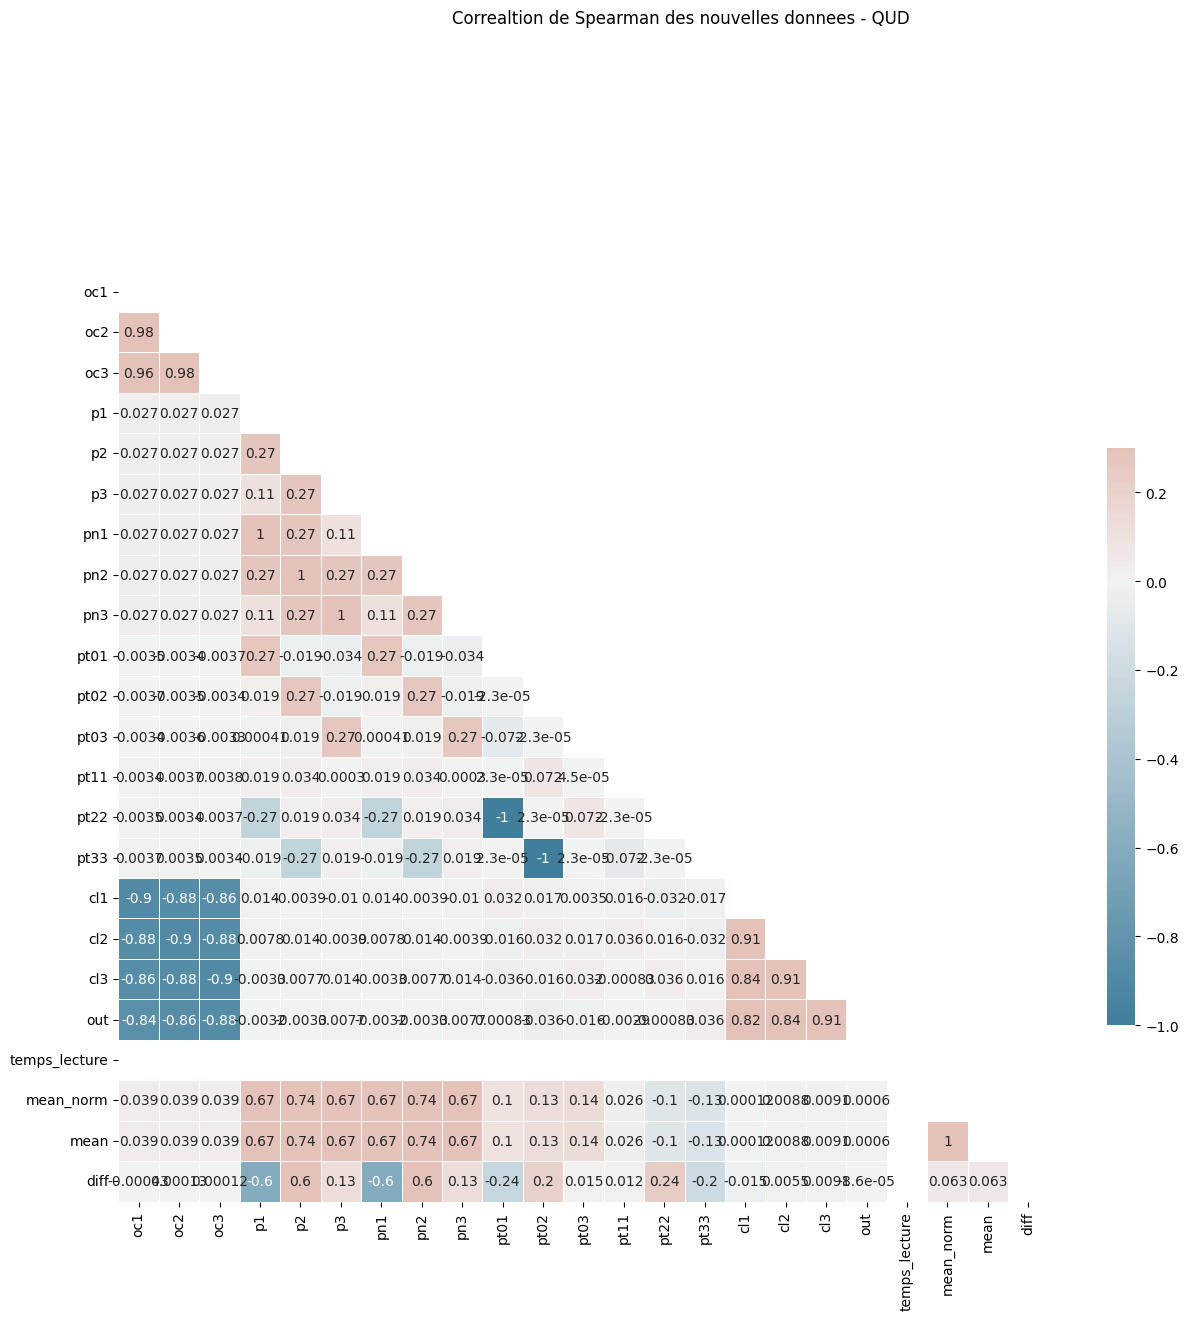

In [ ]:
corr = df.corr('pearson')

# Generate a mask for the upper triangle
mask1 = np.triu(np.ones_like(corr, dtype=bool))

fig, (ax1) = plt.subplots(1, 1 ,  figsize=(15,15))  # figsize=(11,9)
fig.suptitle('Correaltion de Spearman des nouvelles donnees - QUD')
# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)
ax1.plot()
sns.heatmap(corr, mask=mask1, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)
plt.show()

<Axes: title={'center': 'Correaltion de Spearman des nouvelles donnees - QUD'}>

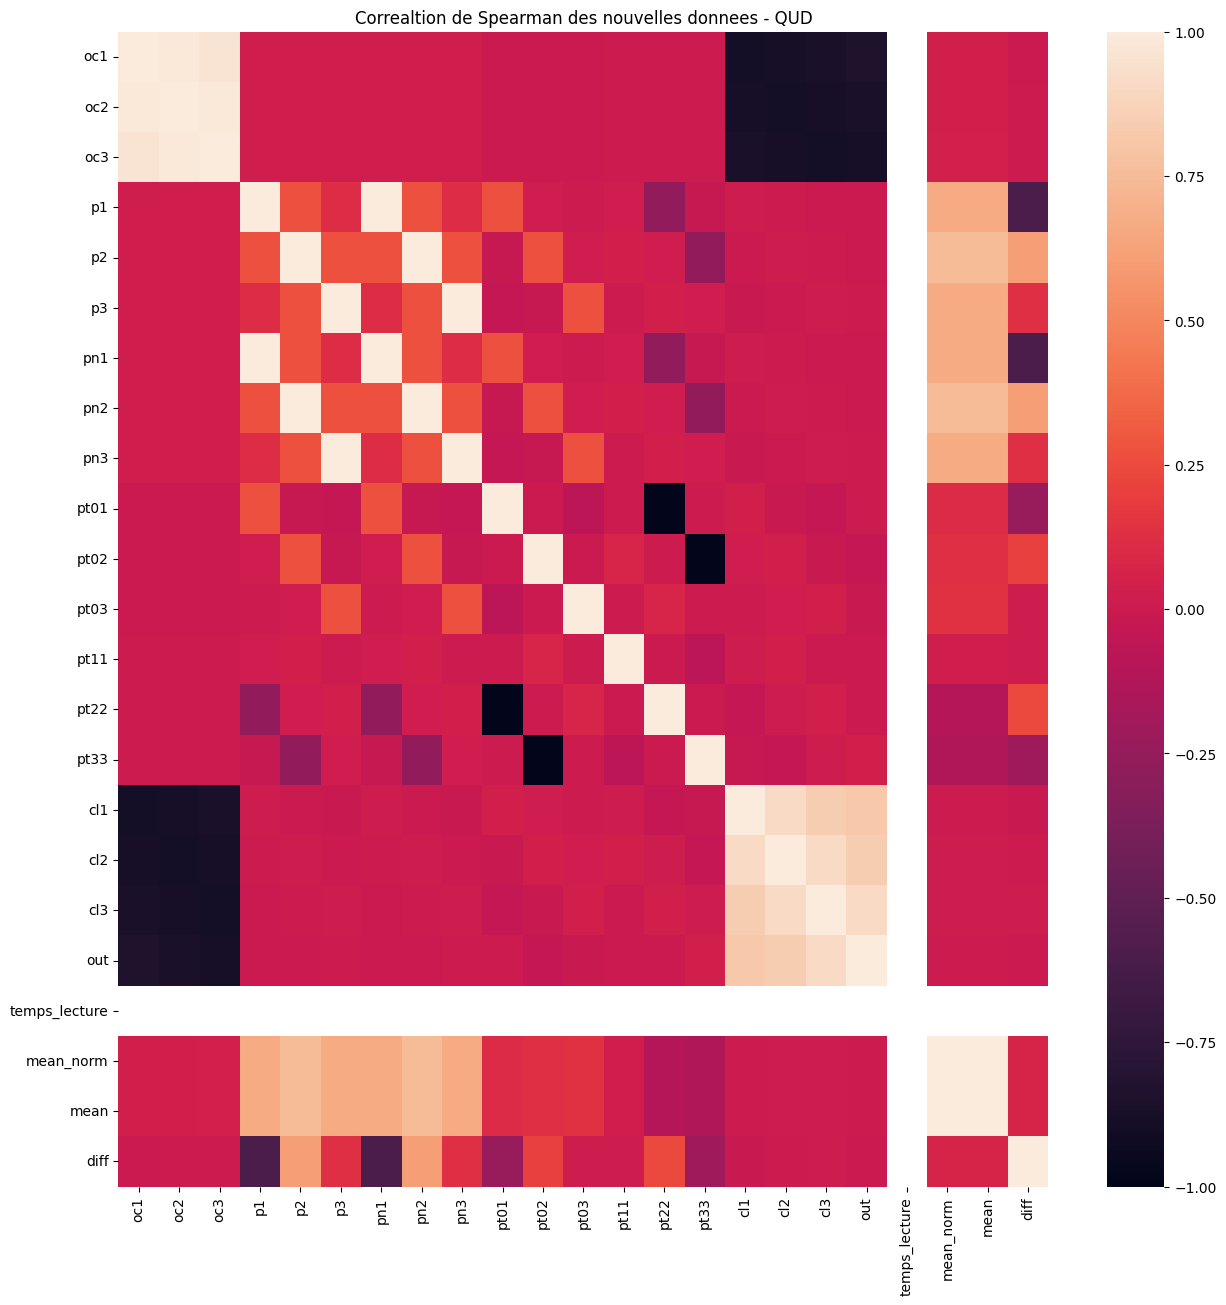

In [ ]:
fig = plt.subplots( figsize =  (15,15)  )
plt.title( "Correaltion de Spearman des nouvelles donnees - QUD" )
sns.heatmap( corr ) # , annot=True